## XGBoost Classifier

In [38]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### XGBoost

In [42]:
import xgboost
print(xgboost.__version__)

1.6.1


In [43]:
from xgboost import XGBClassifier

In [44]:
(XGBClassifier)

xgboost.sklearn.XGBClassifier

In [45]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [46]:
model=xgbt.fit(X_train, y_train)
model

[20:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimarors=10,
              n_estimators=100, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [47]:
xgbt_pred = xgbt.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, xgbt_pred)

0.7445887445887446

In [50]:
xgbt.score(X_train, y_train)

0.9106145251396648

In [51]:
xgbt.score(X_test, y_test)

0.7445887445887446

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

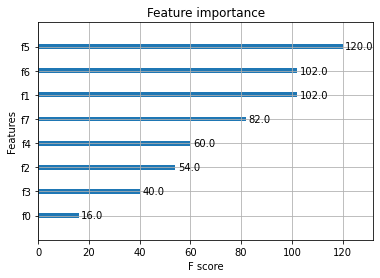

In [53]:
plot_importance(xgbt)